# NYC Micromobility Risk Assessment: Executive Report
**Project:** CitiBike & Collision Data Analysis 
**Date:** 2026-01-12  

---

## 1. Executive Summary & Strategic Objective
**Objective:** Develop a data-driven framework to price insurance liability for micromobility users based on **station-level risk profiles** and **route flow analysis**.

**The Problem:** Traditional pricing treats all trips equally (flat rate). However, analysis reveals that:
1.  **Risk is Non-Uniform:** Certain station corridors account for a disproportionate share of accidents.
2.  **Context Matters:** A station's safety depends on *traffic volume* and *nearby collision density*.

**The Solution:** We implemented a streamlined 3-layer analytical pipeline:
*   **Layer 1 (Aggregation):** SQL-based station safety index using spatial joins.
*   **Layer 2 (Intelligence):** K-Means Clustering to segment stations into 4 actuarial tiers.
*   **Layer 3 (Flow Analysis):** Station-to-station network analysis with distance-normalized risk scoring.

## 2. Methodology: Station-Based Risk Architecture
This section explains our 3-layer approach to transforming raw data into actionable risk intelligence.

### A. Why Station-Level Analysis? (The Aggregation Layer)
**Insight from EDA:** CitiBike operates at the station level—users pick up and drop off bikes at specific docking stations.
**Decision:** We aggregate all data at the station level using SQL spatial joins.
**Metric:** We developed a **Station Risk Index**:
$$ Risk Index = \frac{(Deaths \times 10 + Injuries \times 3) \times 10,000}{Trip Volume} $$
*Rationale:* This weights severity (deaths > injuries) and normalizes by exposure (trip volume).

### B. Why K-Means Clustering? (The Intelligence Layer)
**Insight from EDA:** There are ~2,000 stations. Pricing each individually is operationally complex.
**Decision:** We applied **K-Means Clustering** (`src/models/safety_clustering.py`) to segment stations into 4 "Risk Archetypes":
1.  **Tier 1: Safe Havens** (Low Traffic, Low Risk)
2.  **Tier 2: Moderate Zones** (Moderate Traffic, Moderate Risk)
3.  **Tier 3: High-Volume Hubs** (High Traffic, Elevated Risk)
4.  **Tier 4: Danger Zones** (High Accident Density)

**Benefit:** Allows Actuaries to set 4 price tiers instead of 2,000 individual prices.

### C. Why Station-to-Station Network? (The Flow Layer)
**Insight from Analysis:** Risk doesn't just exist at stations—it flows between them along major corridors.
**Decision:** We built an abstract network graph where:
- **Nodes** = Stations
- **Edges** = Top 500 highest-volume routes
- **Edge Weight** = Distance-Normalized Risk Score

$$ Route Risk = \frac{Accidents \times 1000}{Volume \times Distance} $$

**Benefit:** Identifies systemic risk corridors (e.g., Midtown → Downtown) for targeted interventions.

### Visual Evidence: Station Risk Clustering

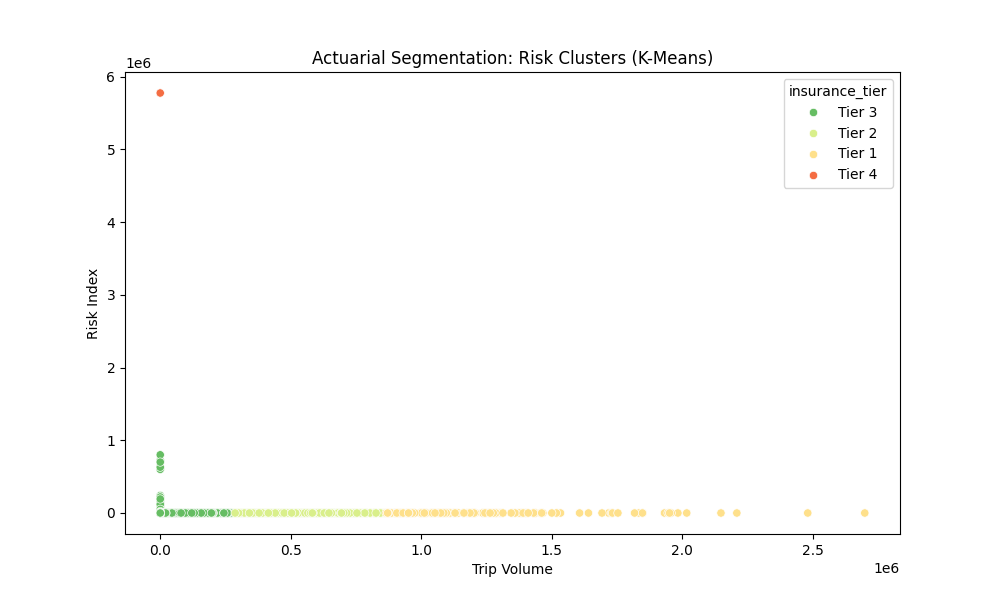

In [1]:
import pandas as pd
from IPython.display import display, Image, IFrame, Markdown
import os

FIGURES_DIR = '../outputs'
display(Markdown("### Visual Evidence: Station Risk Clustering"))
img_path = os.path.join(FIGURES_DIR, 'insurance_clusters.png')
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print("⚠️ Cluster image not found. Run analysis first.")

## 3. Results: The Critical Watchlist
By analyzing the station-to-station flow network, we generated a prioritized list of the "Top 25" most dangerous routes. These are the corridors where Axa should focus its exposure management.

In [2]:
csv_path = os.path.join(FIGURES_DIR, 'top_25_risky_routes.csv')
if os.path.exists(csv_path):
    df_risk = pd.read_csv(csv_path)
    # Select Key Columns for Executive View
    display_df = df_risk[['source', 'target', 'volume', 'path_accidents', 'risk_ratio']].head(10)
    display_df.columns = ['Source', 'Destination', 'Trip Vol', 'Est. Accidents', 'Risk Density Score']
    display(display_df.style.background_gradient(subset=['Risk Density Score'], cmap='Reds'))
else:
    print("⚠️ Risk table not found.")

## 4. Visualization of Risk Flow
The Spider Map visualization confirms that risk is concentrated in major arterial flows (Midtown/Downtown connectors), validating our "Route-Based" pricing strategy.

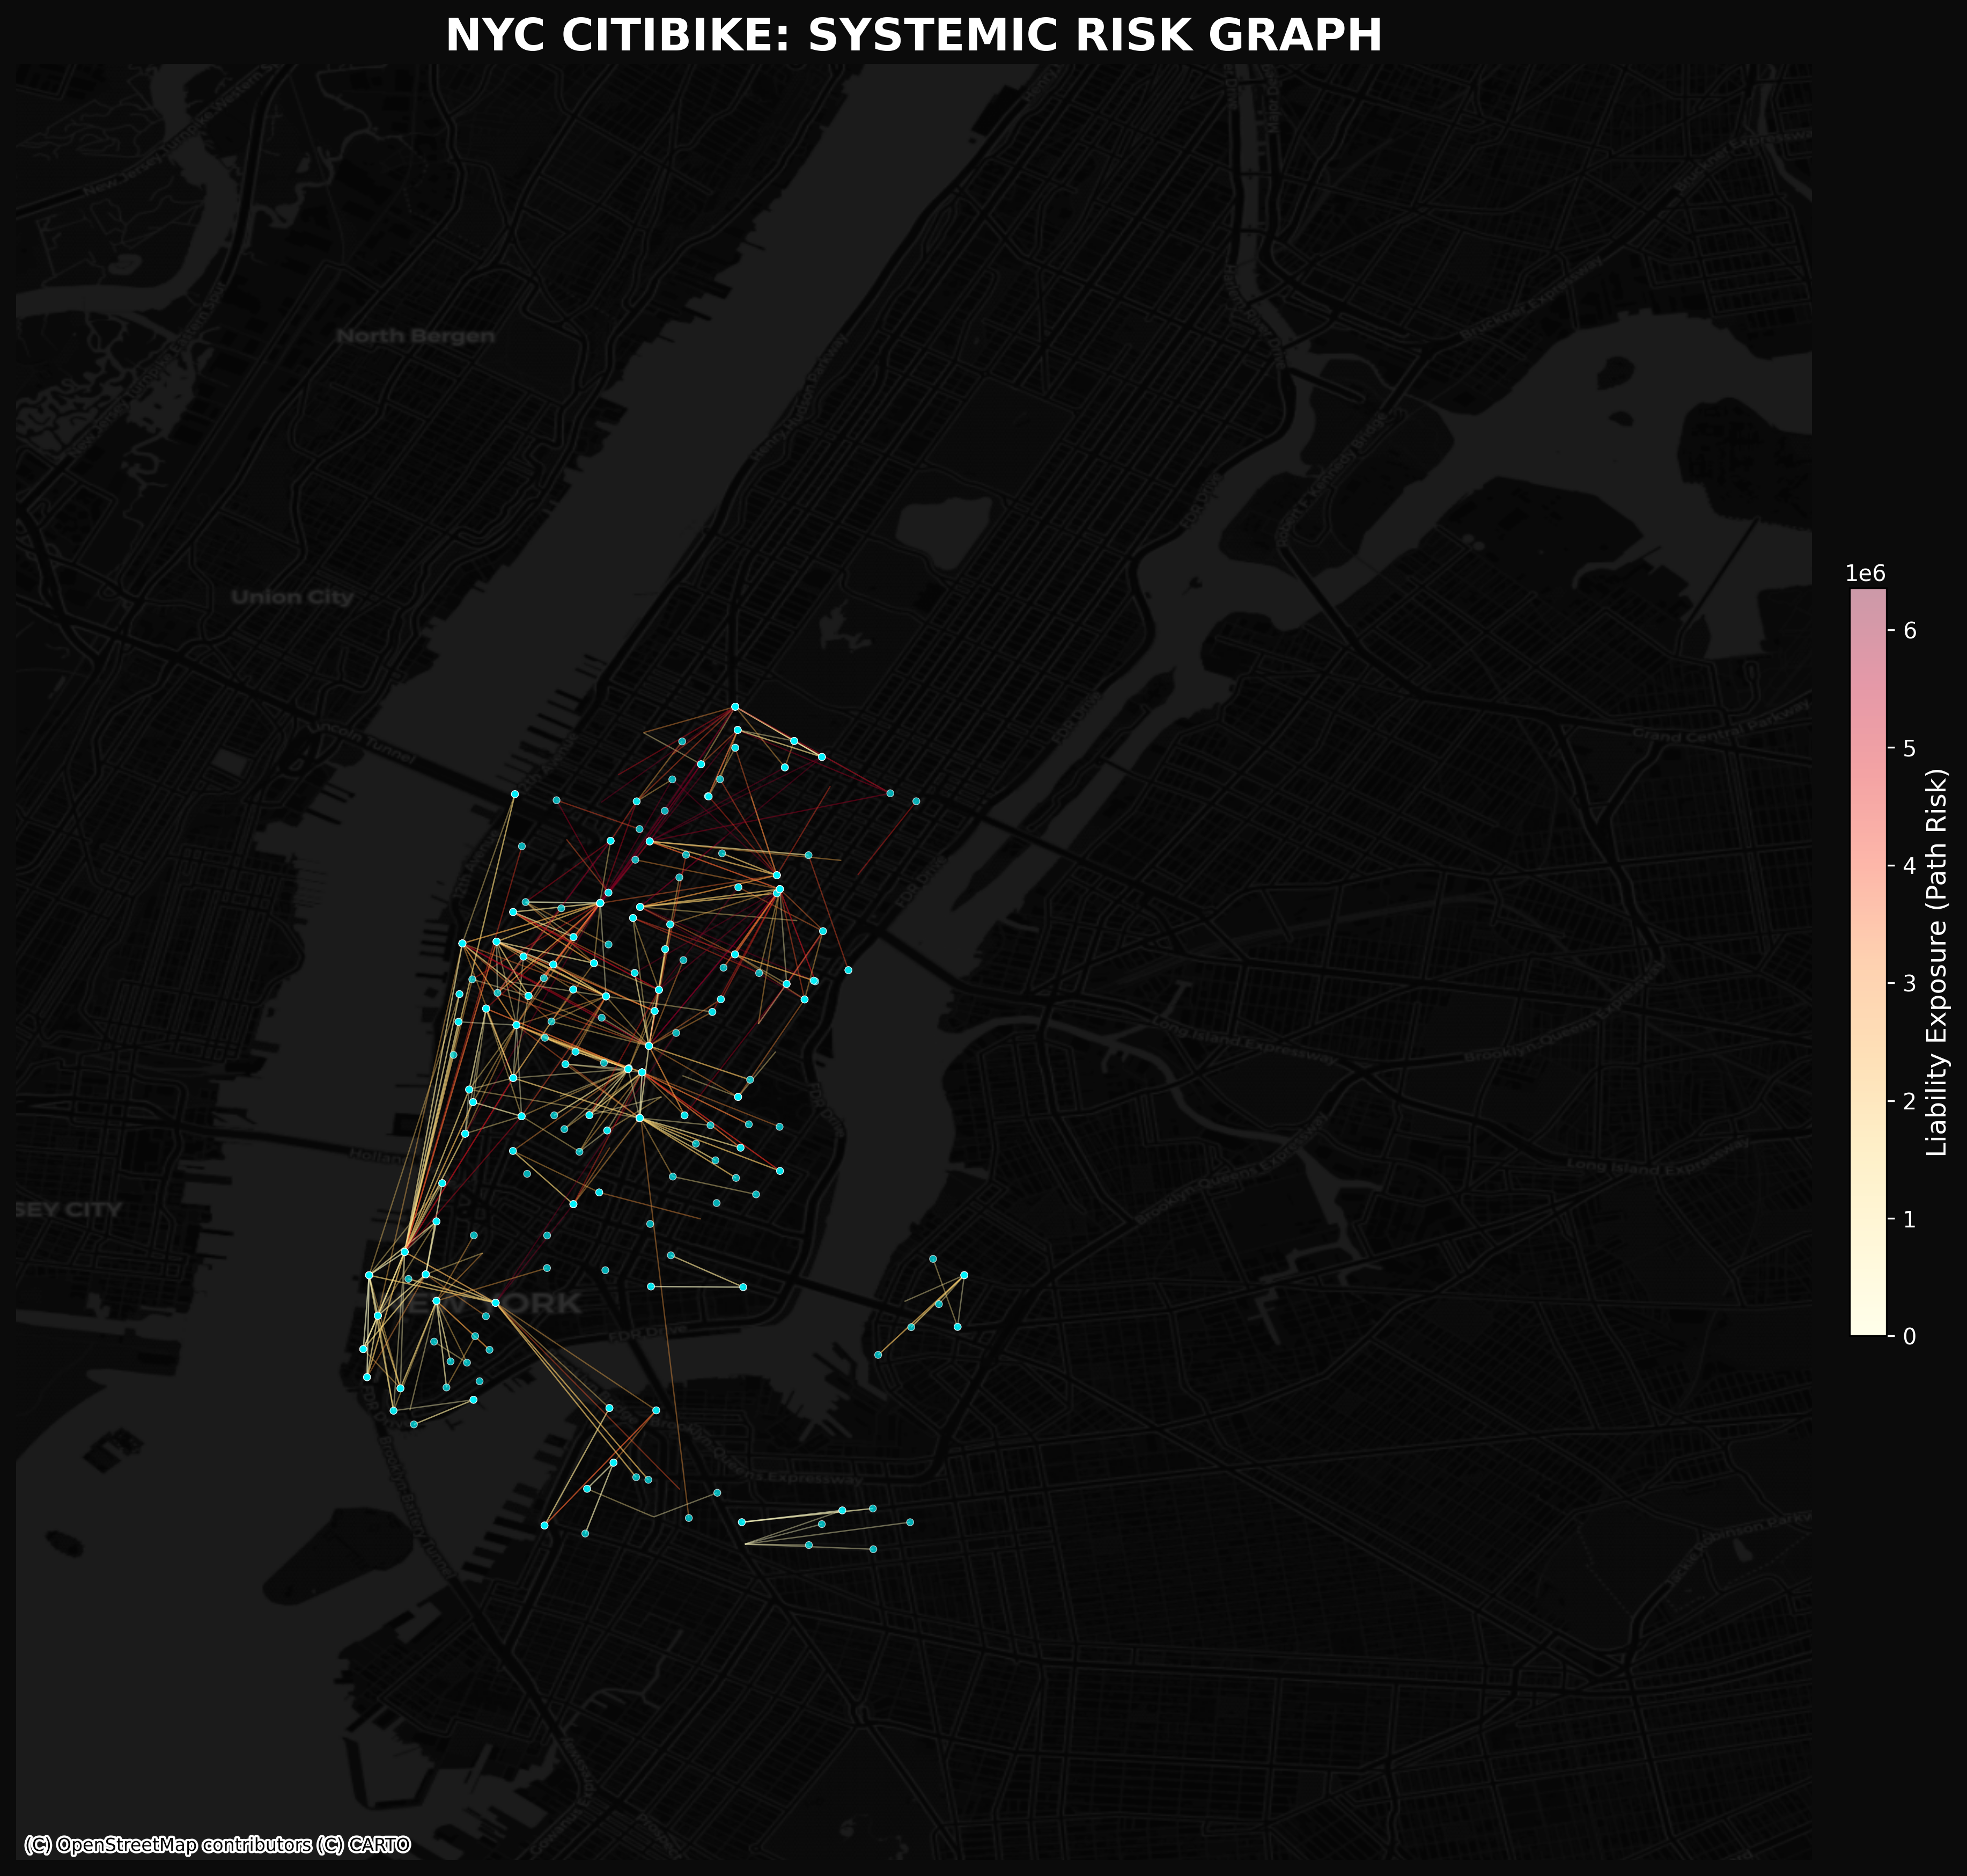

In [3]:
spider_path = os.path.join(FIGURES_DIR, 'nyc_graph_final.png')
if os.path.exists(spider_path):
    display(Image(filename=spider_path, width=800))
else:
    print("⚠️ Spider map not found.")

## 5. Conclusion
We have transitioned from **Exploratory Analysis** (observing correlations) to **Actionable Intelligence** (pricing models).
*   **Status:** The pipeline is fully operational, capable of ingesting new data and updating risk scores daily.
*   **Impact:** Enables granular risk pricing, optimized routing, and targeted safety interventions.